In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
train = pd.read_csv('data/13-Logistic-Regression/titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

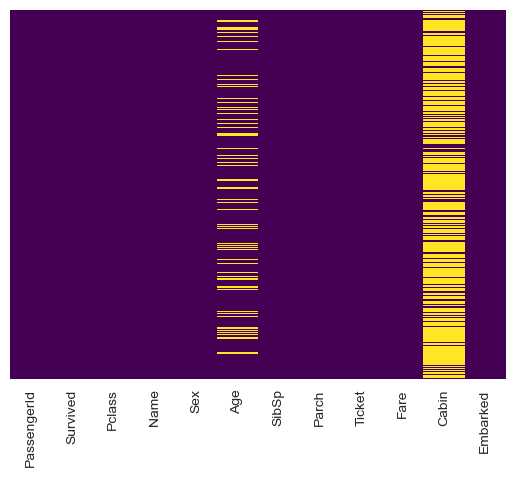

In [131]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

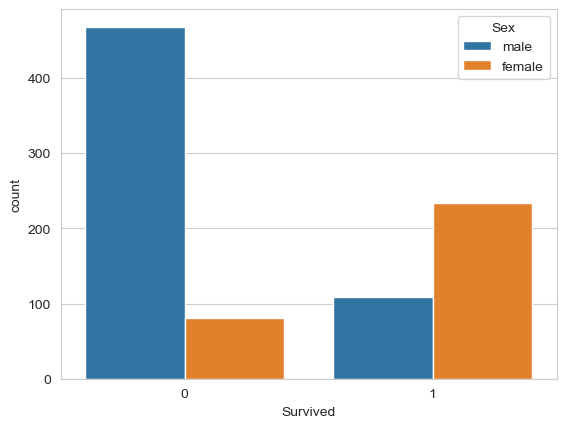

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

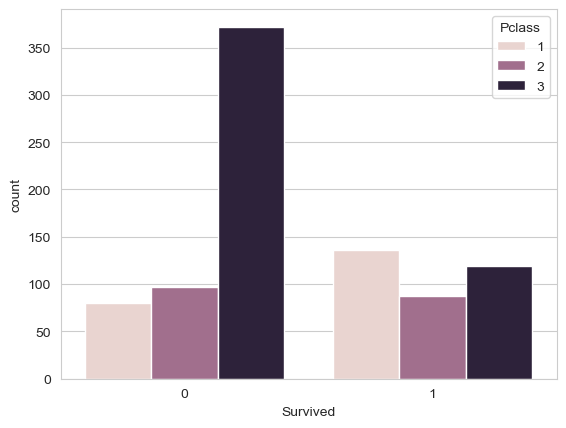

In [133]:
sns.countplot(x='Survived',hue='Pclass',data=train)

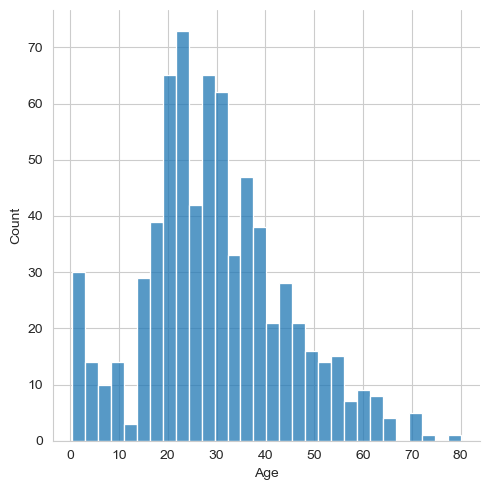

In [134]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

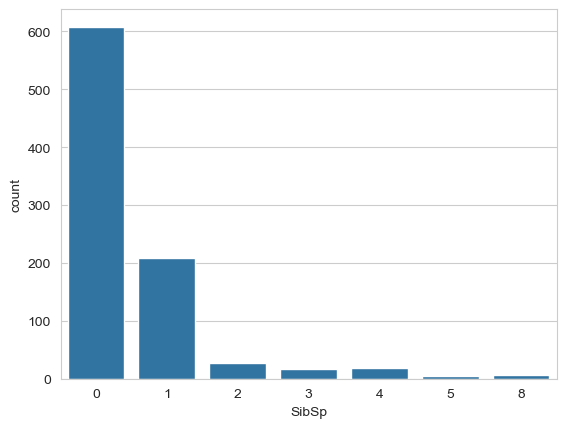

In [135]:
sns.countplot(x='SibSp',data=train)

<Axes: >

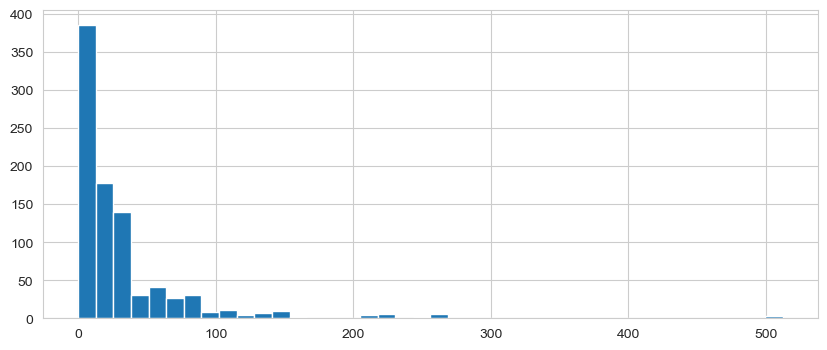

In [136]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [137]:
# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind='hist',bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

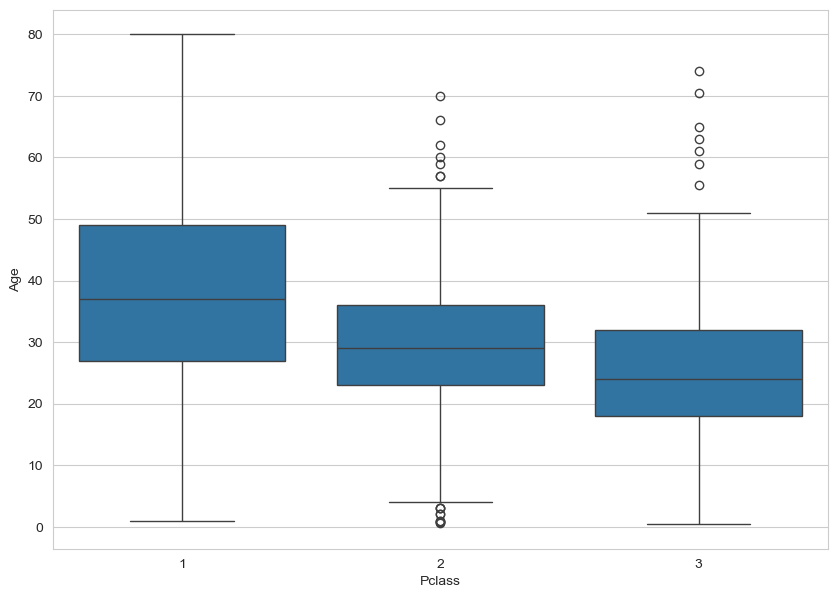

In [138]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [139]:
def impute_age(row):
    age = row['Age']  # Accessing Age by label
    pclass = row['Pclass']  # Accessing Pclass by label

    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return age

In [140]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

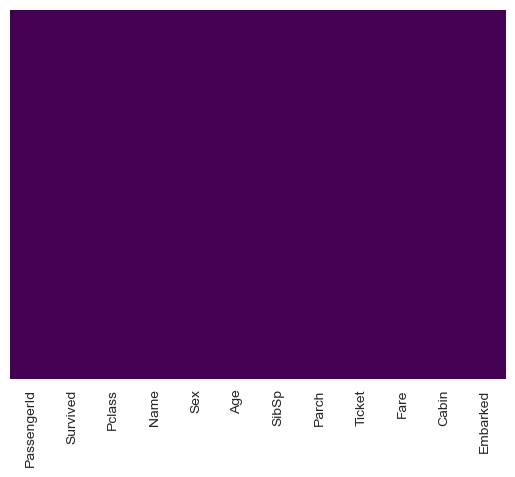

In [141]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [142]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
1,False
3,False
6,True
10,False
11,False
...,...
871,False
872,True
879,False
887,False


In [143]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True
...,...,...
871,False,True
872,False,True
879,False,False
887,False,True


In [144]:
train = pd.concat([train,sex,embark],axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,True


In [145]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [146]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,1,1,38.0,1,0,71.2833,C85,False,False,False
3,1,1,35.0,1,0,53.1000,C123,False,False,True
6,0,1,54.0,0,0,51.8625,E46,True,False,True
10,1,3,4.0,1,1,16.7000,G6,False,False,True
11,1,1,58.0,0,0,26.5500,C103,False,False,True
...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,D35,False,False,True
872,0,1,33.0,0,0,5.0000,B51 B53 B55,True,False,True
879,1,1,56.0,0,1,83.1583,C50,False,False,False
887,1,1,19.0,0,0,30.0000,B42,False,False,True
